# Lab 8: Evolutionary computation

### Consider the following example:

Determine the minimum of the function $f(x)= x_1^2+...+x_n^2$ with $x_i \in [-5.12, 5.12]$, $i \in \overline{(1, n)}$

We have an example of steady state genetic algorithm with:  representation an array of real numbers; 100 individuals; crossover $$child = \alpha \cdot (parent1 - parent2) + parent2 ;$$ mutation - reinitialise on a random position the individual's value.

In [1]:


from random import randint, random
from operator import add
from math import cos, pi


def individual(length, vmin, vmax):
    '''
    Create a member of the population - an individual

    length: the number of genes (components)
    vmin: the minimum possible value 
    vmax: the maximum possible value 
    '''
    return [ (random()*(vmax-vmin)+vmin) for x in range(length) ]
    
def population(count, length, vmin, vmax):
    """
    Create a number of individuals (i.e. a population).

    count: the number of individuals in the population
    length: the number of values per individual
    vmin: the minimum possible value 
    vmax: the maximum possible value 
    """
    return [ individual(length, vmin, vmax) for x in range(count) ]

def fitness(individual):
    """
    Determine the fitness of an individual. Lower is better.(min problem)
    For this problem we have the Rastrigin function
    
    individual: the individual to evaluate
    """
    n=len(individual)
    f=0;
    for i in range(n):
        f=f+individual[i]*individual[i]
    return f
    
def mutate(individual, pM, vmin, vmax): 
    '''
    Performs a mutation on an individual with the probability of pM.
    If the event will take place, at a random position a new value will be
    generated in the interval [vmin, vmax]

    individual:the individual to be mutated
    pM: the probability the mutation to occure
    vmin: the minimum possible value 
    vmax: the maximum possible value
    '''
    if pM > random():
            p = randint(0, len(individual)-1)
            individual[p] = random()*(vmax-vmin)+vmin
    return individual
    
def crossover(parent1, parent2):
    '''
    crossover between 2 parents
    '''
    child=[]
    alpha=random()
    for x in range(len(parent1)):
        child.append(alpha*(parent1[x]-parent2[x])+parent2[x])
    return child

def iteration(pop, pM, vmin, vmax):
    '''
    an iteration

    pop: the current population
    pM: the probability the mutation to occure
    vmin: the minimum possible value 
    vmax: the maximum possible value
    '''
    i1=randint(0,len(pop)-1)
    i2=randint(0,len(pop)-1)
    if (i1!=i2):
        c=crossover(pop[i1],pop[i2])
        c=mutate(c, pM, vmin, vmax)
        f1=fitness(pop[i1])
        f2=fitness(pop[i2])
        '''
        the repeated evaluation of the parents can be avoided
        if  next to the values stored in the individuals we 
        keep also their fitnesses 
        '''
        fc=fitness(c)
        if(f1>f2) and (f1>fc):
            pop[i1]=c
        if(f2>f1) and (f2>fc):
            pop[i2]=c
    return pop

def main(noIteratii=10000):
    #PARAMETERS:
    
    #population size
    dimPopulation = 100
    #individual size
    dimIndividual = 2
    #the boundries of the search interval
    vmin = -5.12
    vmax = 5.12
    #the mutation probability
    pM=0.01
    
    P = population(dimPopulation, dimIndividual, vmin, vmax)
    for i in range(noIteratii):
        P = iteration(P, pM, vmin, vmax)

    #print the best individual
    graded = [ (fitness(x), x) for x in P]
    graded =  sorted(graded)
    result=graded[0]
    fitnessOptim=result[0]
    individualOptim=result[1]
    print('Result: The detected minimum point after %d iterations is f(%3.2f %3.2f) = %3.2f'% \
          (noIteratii,individualOptim[0],individualOptim[1], fitnessOptim) )
        
main()

Result: The detected minimum point after 10000 iterations is f(-0.00 0.00) = 0.00


Exercise 1:  Construct a similar algorithm to the one provided as an example for the Bukin function N.6 (search the internet for this function).


In [2]:
from random import randint, random
from math import sqrt

def individual(min_val, max_val):
    '''
    Create a member of the population - an individual

    min_val: the minimum possible values 
    max_val: the maximum possible values 
    '''
    x_1 = (random() * (max_val[0] - min_val[0]) + min_val[0])
    x_2 = (random() * (max_val[1] - min_val[1]) + min_val[1])
    return [ x_1, x_2 ]
    
def population(population_cap, min_val, max_val):
    """
    Create a number of individuals (i.e. a population).

    population_cap: the number of individuals in the population
    min_val: the minimum possible values
    max_val: the maximum possible values
    """
    return [ individual(min_val, max_val) for _ in range(population_cap) ]

def fitness(individual):
    """
    Determine the fitness of an individual. Lower is better.(min problem)
    
    individual: the individual to evaluate
    """
    x_1, x_2 = individual
    return  100 * sqrt(abs(x_2 - (0.01 * (x_1 **2)))) + 0.01 * abs(x_1 + 10)
    
def mutate(individual, mutation_probability, min_val, max_val): 
    '''
    Performs a mutation on an individual with the probability of mutation_probability.
    If the event will take place, at a random position a new value will be
    generated in the interval [min_val, max_val]

    individual:the individual to be mutated
    mutation_probability: the probability the mutation to occure
    min_val: the minimum possible values
    max_val: the maximum possible values
    '''
    if mutation_probability > random():
            random_index = randint(0, 1)
            individual[random_index] = random() * (max_val[random_index] - min_val[random_index]) + min_val[random_index]
    return individual
    
def crossover(parent1, parent2):
    '''
    crossover between 2 parents
    '''
    child = []
    alpha = random()
    for x in range(len(parent1)):
        child.append(alpha * (parent1[x] - parent2[x]) + parent2[x])
    return child

def iteration(population, mutation_probability, min_val, max_val):
    '''
    an iteration

    population: the current population
    mutation_probability: the probability the mutation to occure
    min_val: the minimum possible value 
    max_val: the maximum possible value
    '''
    index1 = randint(0, len(population) - 1)
    index2 = randint(0, len(population) - 1)
    if (index1 != index2):
        parent1 = population[index1]
        parent2 = population[index2]
        child = crossover(parent1, parent2)
        child = mutate(child, mutation_probability, min_val, max_val)
        f1 = fitness(parent1)
        f2 = fitness(parent2)
        '''
        the repeated evaluation of the parents can be avoided
        if  next to the values stored in the individuals we 
        keep also their fitnesses 
        '''
        fc = fitness(child)
        if(f1 > f2) and (f1 > fc):
            population[index1] = child
        if(f2 > f1) and (f2 > fc):
            population[index2] = child
    return population

def main(iter_count=10_000):
    #PARAMETERS:
    
    #population size
    population_size = 100
    #individual size
    individual_size = 2
    #the boundries of the search interval
     # x_1 is in [-15, -5]
    # x_2 is in [-3, 3]
    min_val = [-15, -3]
    max_val = [-5, 3]
    #the mutation probability
    mutation_probability = 0.2
    
    current_population = population(population_size, min_val, max_val)
    for i in range(iter_count):
        current_population = iteration(current_population, mutation_probability, min_val, max_val)

    #print the best individual
    graded = [ (fitness(individual), individual) for individual in current_population]
    graded =  sorted(graded)
    best_pair = graded[0]
    best_fitness, best_individual = best_pair
    print('Result: The detected minimum point after %d iterations is f(%3.2f %3.2f) = %3.2f'% \
          (iter_count, best_individual[0],best_individual[1], best_fitness) )
    print('Actual minimum of the function is f(-10, 1) = 0')
main()

Result: The detected minimum point after 10000 iterations is f(-10.96 1.20) = 0.01
Actual minimum of the function is f(-10, 1) = 0


Consider the knapsack problem:

Consider a Knapsack with a total volum equal with $V_{max}$.

There are $n$ objects, with values $(p_i)_{n}$ and volumes $(v_i)_n$.

Solve this problem using a generationist Genetic Algorithm, with a binary representation.

Exercise 2: Initialization
Objective: Implement the initialization step of a genetic algorithm.

In [3]:
import random

def initialize_population(population_size, chromosome_length):
    # generate random a population with population_size number of individuals
    # each individual with the size chromosome_length
    # IN:  population_size, chromosome_length
    # OUT: population
    
    return [[ random.randint(0,1) for _ in range(chromosome_length) ] for _ in range(population_size)]

# Test the initialization step
population_size = 10
chromosome_length = 8
values = [ 1, 2, 3, 4, 15, 26, 37, 48]
weights = [1, 2, 4, 8, 16, 32, 64,128]
max_weight = 100
population = initialize_population(population_size, chromosome_length)
print(population)

[[1, 1, 1, 1, 0, 0, 0, 1], [1, 0, 0, 0, 0, 1, 0, 0], [0, 1, 1, 0, 0, 0, 0, 0], [0, 1, 1, 0, 0, 1, 0, 1], [0, 0, 0, 0, 1, 0, 0, 0], [1, 1, 1, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 1], [0, 0, 1, 0, 0, 1, 0, 0], [1, 1, 1, 0, 1, 1, 0, 0], [0, 0, 0, 0, 1, 1, 0, 0]]


Exercise 3: Fitness Evaluation

Objective: Implement the fitness evaluation step of a genetic algorithm.

In [4]:
def evaluate_fitness(population, values, weights, max_weight):
    # evaluate the fitness of each individual in the population
    # IN:  population, values, weights, max_weight
    # OUT: fitness_scores
    fitnesses = []
    for individual in population:
        total_val = 0
        total_weight = 0
        for index, gene in enumerate(individual):
            total_val += values[index] * gene
            total_weight += weights[index] * gene 
        fitnesses.append(total_val if total_weight <= max_weight else 0)
    return fitnesses

fitness_scores = evaluate_fitness(population,values,weights, max_weight)
print(fitness_scores)

[0, 27, 5, 0, 15, 21, 0, 29, 47, 41]


Exercise 4: Selection

Objective: Implement the selection step of a genetic algorithm.

In [5]:
def select_parents(population, fitness_scores):
    # select two parents from the population based on the fitness - 
    # the better the fitness, the higher the chance to be selected
    # IN:  population, fitness_scores
    # OUT: selected_parents
    scaling_factor = sum(fitness_scores)
    
    scaled_probabilities = [fitness_score/scaling_factor for fitness_score in fitness_scores]
    father = random.choices(population, weights=scaled_probabilities)[0]
    mother = random.choices(population, weights=scaled_probabilities)[0]
    return father,mother
    
# Test the selection step
parents = select_parents(population, fitness_scores)
print(parents)

([0, 0, 0, 0, 1, 1, 0, 0], [1, 1, 1, 0, 1, 1, 0, 0])


Exercise 5: Crossover

Objective: Implement the crossover step of a genetic algorithm.

In [6]:
def crossover(parents):
    # create two new offspring by combining the parents
    # IN:  parents
    # OUT: offspring
    father,mother = parents
    if len(father) != len(mother):
        raise ValueError("The parents do not have the same size")
    crossover_point = random.randint(0, len(father) - 1)
    son = father[:crossover_point] + mother[crossover_point:]
    daughter = mother[:crossover_point] + father[crossover_point:]
    return son, daughter

offspring = crossover(parents)
print(offspring)

([1, 1, 1, 0, 1, 1, 0, 0], [0, 0, 0, 0, 1, 1, 0, 0])


Exercise 6: Mutation

Objective: Implement the mutation step of a genetic algorithm.

In [7]:
def mutate(chromosome, mutation_rate):
    # mutate the chromosome by randomly flipping bits
    # IN:  chromosome, mutation_rate
    # OUT: mutated_chromosome
    return [(gene if (random.random() < mutation_rate) else (1 - gene)) for gene in chromosome]

mutation_rate = 0.1
mutated_offspring = [mutate(child, mutation_rate) for child in offspring]
print(mutated_offspring)

[[0, 0, 0, 0, 1, 0, 0, 1], [1, 1, 1, 1, 0, 0, 1, 1]]


Exercise 7: Complete Genetic Algorithm

Objective: Combine all the steps of a genetic algorithm to solve a specific problem.

In [8]:
def genetic_algorithm(population_size, chromosome_length, generations, mutation_rate, values, weights, max_weight):
    
    # complete genetic algorithm
    # IN:  population_size, chromosome_length, generations, mutation_rate, values, weights, max_weight
    # OUT: population

    population = initialize_population(population_size, chromosome_length)
    
    for _ in range(generations):
        # Fitness evaluation
        
        fitness_scores = evaluate_fitness(population,values,weights, max_weight)
        
        # If the entire population is useless, start over
        while sum(fitness_scores) == 0:
            population = initialize_population(population_size, chromosome_length)
            fitness_scores = evaluate_fitness(population,values,weights, max_weight)

        # Selection
        parents = select_parents(population, fitness_scores)

        # Crossover
        offspring = crossover(parents)

        # Mutation
        mutated_offspring = [mutate(child, mutation_rate) for child in offspring]

        # Replace the population with the new generation
        for child in mutated_offspring:
            population.append(child)

        sorted(population, key=lambda x: evaluate_fitness([x], values, weights, max_weight))
        population = population[:population_size]

    return population

# Test the complete genetic algorithm
values = [ 1, 2, 3, 4, 15, 26, 37, 48]
weights = [1, 2, 4, 8, 16, 32, 64,128]
max_weight = 100
population_size = 10
chromosome_length = 8
generations = 100
mutation_rate = 0.75

final_population = genetic_algorithm(population_size, chromosome_length, generations, mutation_rate, values, weights, max_weight)
print(final_population)

[[0, 0, 0, 0, 1, 1, 0, 1], [1, 1, 0, 0, 1, 1, 0, 1], [0, 1, 0, 1, 0, 0, 1, 0], [0, 0, 1, 1, 1, 1, 1, 0], [0, 0, 0, 1, 0, 0, 0, 0], [1, 1, 0, 0, 1, 1, 0, 1], [1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 0, 1, 1, 0, 1, 0], [1, 0, 0, 0, 1, 0, 0, 0], [1, 1, 0, 0, 0, 0, 1, 0]]


Exercise 8: Extract the result from the final population

Objective: Get the best individual from the final population.


In [9]:
# determine the best individual from the final population and print it out

# your code here



In [10]:
fitnesses = evaluate_fitness(final_population, values, weights, max_weight)
graded = [ (fitness, individual) for fitness,individual in zip(fitnesses,final_population)]
graded =  sorted(graded)
best_pair = graded[-1]
best_fitness, best_individual = best_pair
print(best_fitness)
print(best_individual)

59
[1, 1, 0, 1, 1, 0, 1, 0]


In [11]:
import matplotlib.pyplot as plt

In [12]:
def evolution_loop(values, weights, max_weight, generations, population_size, iter_count = 100):
    chromosome_length = len(values)
    colors = ['skyblue', 'crimson', 'gold', 'green', 'navy', 'silver']
    plt.figure(figsize=(18, 9))
    for index, mutation_rate in enumerate([0.01, 0.1, 0.25, 0.5, 0.75, 0.9]):

        results = []
        for _ in range(iter_count):
            population = genetic_algorithm(population_size, chromosome_length, generations, mutation_rate, values, weights, max_weight)
            fitnesses = evaluate_fitness(population, values, weights, max_weight)
            best_fitness = max(fitnesses)
            results.append(best_fitness)
                
    
        plt.subplot(2, 3, index + 1)
        plt.hist(results, bins=10, color=colors[index], edgecolor='black')
        plt.title(f'Mutation rate: {mutation_rate}, Avg Result: {sum(results)/iter_count:.2f}')
        plt.xlabel('Best Fitness')
        plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

In [13]:
values = [15, 12, 8, 10, 5, 14, 20, 18, 16, 7, 9, 11, 13, 6, 17]
weights = [6, 5, 8, 7, 3, 9, 10, 11, 12, 4, 2, 7, 5, 3, 8]
max_weight = 30
generations = 10

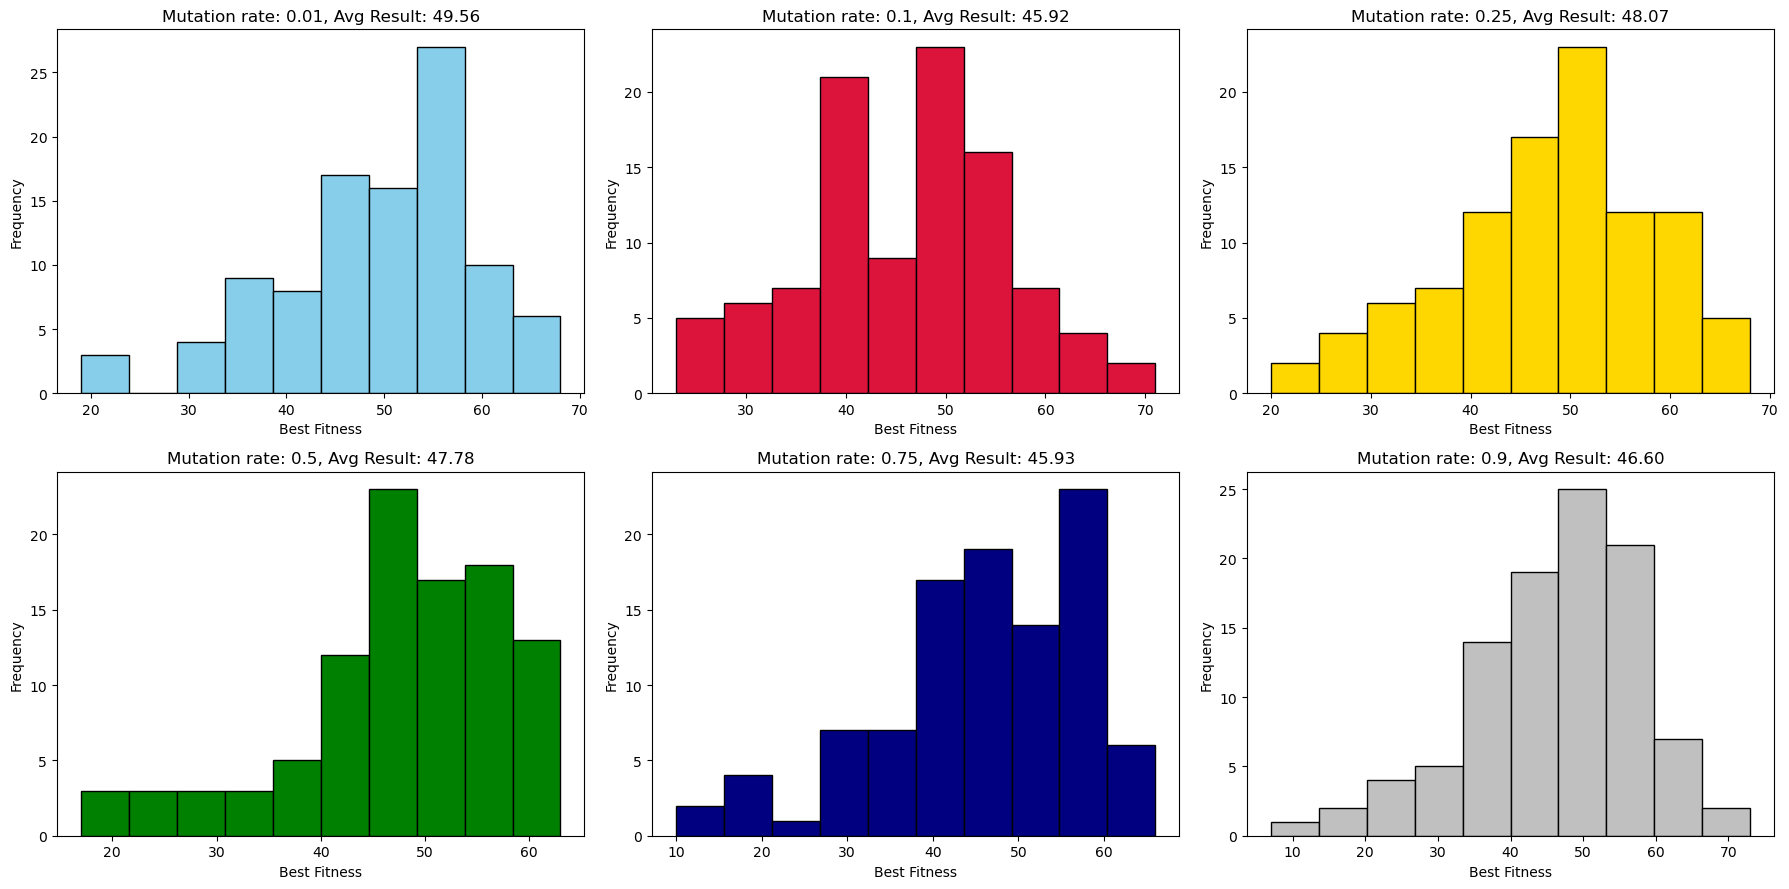

In [14]:
evolution_loop(values, weights, max_weight, generations, 5)

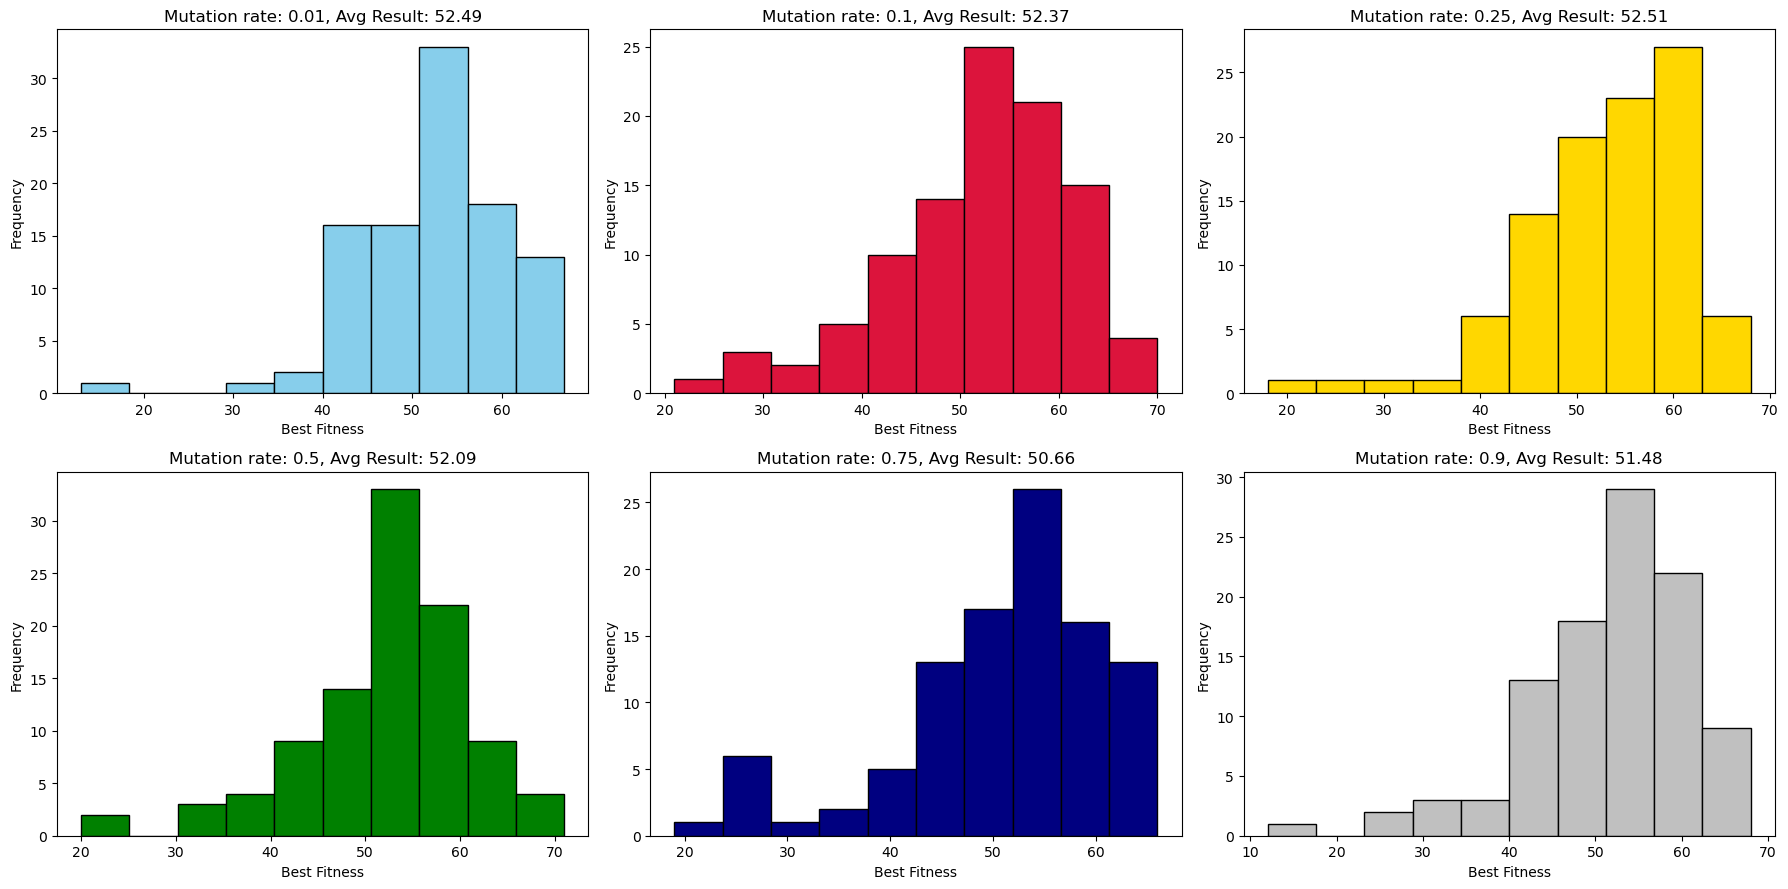

In [15]:
evolution_loop(values, weights, max_weight, generations, 25)